In [341]:
from io import open
import glob
import os

In [342]:
def findFiles(path):
    return glob.glob(path)

In [343]:
print(findFiles('data/names/*.txt'))

['data/names\\Arabic.txt', 'data/names\\Chinese.txt', 'data/names\\Czech.txt', 'data/names\\Dutch.txt', 'data/names\\English.txt', 'data/names\\French.txt', 'data/names\\German.txt', 'data/names\\Greek.txt', 'data/names\\Irish.txt', 'data/names\\Italian.txt', 'data/names\\Japanese.txt', 'data/names\\Korean.txt', 'data/names\\Polish.txt', 'data/names\\Portuguese.txt', 'data/names\\Russian.txt', 'data/names\\Scottish.txt', 'data/names\\Spanish.txt', 'data/names\\Vietnamese.txt']


In [344]:
import unicodedata
import string

In [345]:
# 所有大小写字母以及空格、句号、逗号、分号、引号，共57个
all_letters = string.ascii_letters + " .,;'"

In [346]:
n_letters = len(all_letters) # 57

In [347]:
# 将Unicode字符转换为ASCII
# 简而言之这个函数的作用就是去除某些语音中的重音标记
# 比如：Ślusàrski --> Slusarski
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [348]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [349]:
# 字典category_lines键为语言，值为保存一个所有名字的列表
# 列表all_categories保存所有语言名
category_lines = {}
all_categories = []

In [350]:
# 读取文件并进行分割形成列表
def readLines(filename):
    # read()将整个文件读入，strip()去除两侧空白符，使用'\n'进行划分
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    # 对应每一个lines列表中的名字进行Ascii转换, 使其规范化.最后返回一个名字列表
    return [unicodeToAscii(line) for line in lines]

In [351]:
for filename in findFiles('data/names/*.txt'):
    # basename返回文件名，即去除路径
    # splitext将文件名称与后缀分割开，[0]即是文件名称
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

In [352]:
n_categories = len(all_categories)
print(n_categoris)

18


In [487]:
print("all_categories: ", all_categories)

all_categories:  ['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']


In [488]:
print("Italian: ", category_lines['Italian'][:5])

Italian:  ['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [355]:
import torch

In [356]:
def letterToIndex(letter):
    return all_letters.find(letter)

In [357]:
print(letterToIndex('a'))

0


In [358]:
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

In [359]:
print(letterToTensor('J'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [360]:
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [361]:
print(lineToTensor('Jones')) # torch.Size([5, 1, 57])

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [362]:
from torch import nn

In [363]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input,hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [364]:
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [365]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

In [366]:
output, next_hidden = rnn(input, hidden)

In [367]:
output.size()

torch.Size([1, 18])

In [368]:
next_hidden.size()

torch.Size([1, 128])

In [369]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

In [370]:
input.shape

torch.Size([6, 1, 57])

In [371]:
output, next_hidden = rnn(input[0], hidden)
print(output.size())
print(next_hidden.size())

torch.Size([1, 18])
torch.Size([1, 128])


In [372]:
def categoryFromOutput(output):
    # 最大值top_n及其所在下标top_i
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

In [373]:
print(categoryFromOutput(output))

('Portuguese', 13)


In [374]:
import random

In [375]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

In [376]:
randomChoice(all_categories)

'Polish'

In [377]:
# 快速随机获取训练数据（名字以及所属语言）
def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Italian / line = Petri
category = Czech / line = Korycan
category = Arabic / line = Asghar
category = Vietnamese / line = Than
category = Polish / line = Wojda
category = Greek / line = Maneates
category = Greek / line = Tselios
category = Scottish / line = Hill
category = Russian / line = Adamovitch
category = Greek / line = Karkampasis


In [327]:
criterion = nn.NLLLoss()

In [382]:
learning_rate = 0.005

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    loss.backward()
    
    # 更新模型中的参数
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)
    
    return output, loss.item()

In [383]:
import time
import math

In [384]:
n_iters = 100000
print_every = 5000
plot_every = 1000

In [385]:
current_loss = 0
all_losses = []

In [386]:
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [387]:
start = time.time()
for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, 
                                                timeSince(start), loss, line, guess, correct))
        
    if iter % plot_every == 0:
        all_losses.append(current_loss/plot_every)
        current_loss = 0

5000 5% (0m 12s) 2.7593 Guerra / Japanese ✗ (Portuguese)
10000 10% (0m 23s) 3.0733 Bahvaloff / Scottish ✗ (Russian)
15000 15% (0m 34s) 1.7275 Nosek / Czech ✗ (Polish)
20000 20% (0m 44s) 1.6654 Tosi / Italian ✓
25000 25% (0m 54s) 1.2599 Zhilkin / Russian ✓
30000 30% (1m 4s) 2.2486 Deniel / Portuguese ✗ (French)
35000 35% (1m 14s) 0.8166 Tchehluev / Russian ✓
40000 40% (1m 24s) 0.8256 Fei / Chinese ✓
45000 45% (1m 35s) 4.0699 Kool / Korean ✗ (Dutch)
50000 50% (1m 45s) 1.3071 Buckholtz / Scottish ✗ (German)
55000 55% (1m 55s) 0.8277 Vo / Vietnamese ✓
60000 60% (2m 6s) 1.7692 Huang / Vietnamese ✗ (Chinese)
65000 65% (2m 17s) 0.2499 Yim / Korean ✓
70000 70% (2m 29s) 0.0152 Akrivopoulos / Greek ✓
75000 75% (2m 40s) 0.5435 Mooney / Irish ✓
80000 80% (2m 52s) 1.6462 Kieu / Chinese ✗ (Vietnamese)
85000 85% (3m 4s) 4.9142 Samuel / Arabic ✗ (Irish)
90000 90% (3m 15s) 0.3337 Paloumbas / Greek ✓
95000 95% (3m 26s) 0.0426 Kassab / Arabic ✓
100000 100% (3m 37s) 2.6238 Michel / Irish ✗ (Dutch)


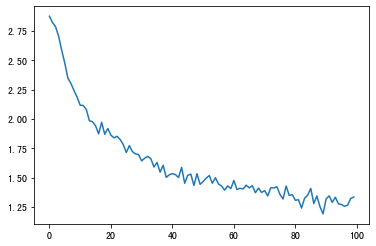

In [390]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

In [420]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

In [421]:
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

In [422]:
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

In [423]:
# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

C:\Users\WSA51\AppData\Local\Temp/ipykernel_3080/2790241398.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_categories, rotation=90)
C:\Users\WSA51\AppData\Local\Temp/ipykernel_3080/2790241398.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_categories)


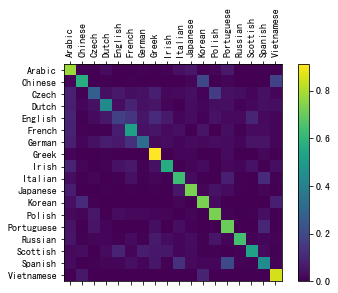

In [494]:
# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [486]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.36) Russian
(-1.75) Czech
(-3.24) English

> Jackson
(-0.80) Scottish
(-1.34) Greek
(-2.34) English

> Satoshi
(-1.10) Italian
(-1.54) Polish
(-1.81) Japanese
